In [130]:
# Import the necessary modules and libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydot
import pydotplus
from matplotlib.colors import ListedColormap
from sklearn import tree

In [131]:
# Create datase.
X, y = make_regression(n_samples=1000, n_features=1, n_informative=1, random_state=42, noise=5)

In [132]:
# Split the dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

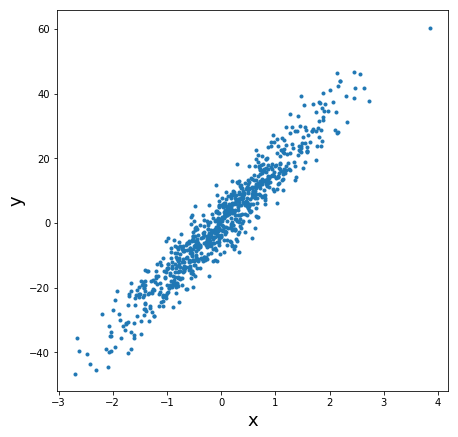

In [133]:
# Plot the noisy data.
plt.figure(figsize=(7,7))
plt.plot(X_train, y_train, '.')
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.show()

# Using Grid Search to fine-tune 'max_depth' and 'min_samples_leaf' hyperparameters

In [134]:
# Set parameters for grid-search.
param_grid = [{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]

# Instantiate DT class.
reg = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(reg, param_grid, cv=5, verbose=3, n_jobs=-1)

# Find best hyperparameters.
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 110 candidates, totalling 550 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 296 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 550 out of 550 | elapsed:    1.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [135]:
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 9}

In [136]:
y_pred = grid_search.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print('mse: ',mse)

mse:  29.585610584598868


In [137]:
clf = DecisionTreeRegressor(random_state=42, max_depth=5, min_samples_leaf=9)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print('mse: ',mse)

mse:  29.585610584598868


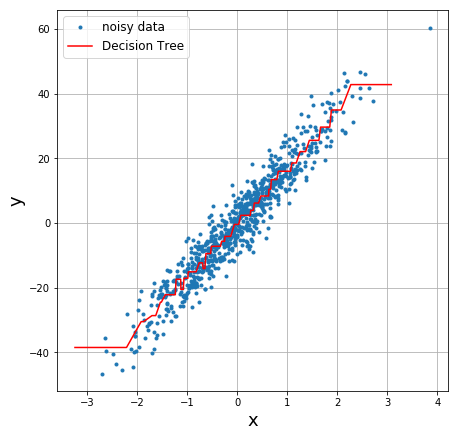

In [138]:
# Plot noisy data plus decision tree.
X_test = np.sort(X_test, axis=0)
y_pred = clf.predict(X_test)

plt.figure(figsize=(7,7))
plt.plot(X_train, y_train, '.', label='noisy data')
plt.plot(X_test, y_pred, 'r-', label='Decision Tree')
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.legend(fontsize=12)
plt.grid()
plt.savefig('dt_regression.png', dpi=600)
plt.show()

In [139]:
# visualize the decision tree.
# you've got to have graphviz and pydot installed on your computer.
# Execute: conda install graphviz pydot
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())
# Create png file.
graph[0].write_png("make_regression_dt.png")